In [193]:
%matplotlib inline
%load_ext jupyternotify
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from fair_policies import * 


The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [170]:
df = pd.read_stata('../../../datasets/behaghel_crepon_gurgand_private_public_provision_counseling/dataPrivatePublic.dta')
df_csv = pd.read_csv('../../../datasets/behaghel_crepon_gurgand_private_public_provision_counseling/data.csv')

In [171]:
df_csv.head()
[ c for c in df_csv.columns ]
replace_cols = { "IdF": "Paris_region","North": "North",
"EconLayoff": "Economic_Layoff","PersLayoff": "Personnal_Layoff","EndCDD": "End_of_Fixed_Term_Contract","EndInterim": "End_of_Temporary_Work",
"Otherend": "Other_reasons_of_unemployment",
"exper0": "No_exp_in_the_job",
"exper1_5": "One_to_5_years_of_exp_in_the_job",
"experM5": "More_5_years_of_exp_in_the_job",
"rsqstat2": "Statistical_risk_level_2",
"rsqstat3": "Statistical_risk_level_3",
"Orsqstat": "Other_Statistical_risk",
"tempcomp": "Search_for_a_full_time_position",
"Otemp": "Do_not_search_for_a_full_time_position",
"dezus": "Sensitive_suburban_area",
"salaireA": "Wage_target_1200_1349_euros",
"salaireB": "Wage_target_1350_1549_euros",
"salaireC": "Wage_target_1550_1799_euros",
"salaireD": "Wage_target_1800_2200_euros",
"salaireE": "Wage_target_2200_euros",
"salaireG": "No_Wage_target",
"ce1": "Employment_component_level_1",
"ce2": "Employment_component_level_2",
"cemiss": "Employment_component_missing",
"primo": "First_unemployment_spell",
"Cadre": "Manager",
"Techn": "Technician",
"EmployQ": "Skilled_clerical_worker",
"EmployNQ": "Unskilled_clerical_worker",
"OuvrQ": "Skilled_blue_colar",
"OuvrNQ": "Unskilled_blue_colar",
"African": "African",
"EasternEurope": "Eastern_Europe",
"SouthEuropTurkey": "South_Europe_and_Turkey",
"nochild": "No_child",
"onechild": "One_child",
"twoormorechild": "More_than_one_child",
"woman": "Woman",
"nivetude1": "College_education",
"nivetude1": "College_education",
"nivetude3": "Vocational",
"nivetude4": "High_school_dropout",
"age3049": "Age_between_30_and_49",
"age50p": "Age_above_50",
"femme": "Woman",
"etranger": "French_citizen",
"marie": "Married",
"motins_lic": "Layoff",
"nenf": "Number_of_children",
"agegr2635": "Aged_26_to_35",
"agegr3645": "Aged_36_to_45",
"agegr4655": "Aged_46_to_55",
"agegr56": "Aged_above_56",
"agegr26": "age_below_26" ,
"French": "French",
"Otherregion": "Other_regions",
"Othernation": "Other_Nationality"}

In [172]:
pd.set_option('display.max_columns', 500)
df_csv = df_csv.rename(columns=replace_cols)
# print [ c for c in df_csv.columns ]
X_cols = ['mois_saisie_occ', 'ndem', 'Number_of_children', 'temps', 'exper', 'age', 'rsqstat', 'cemploi', 'zus', 'salaire', 'duree_listes_horsAR', 'lot', 'College_education', 'nivetude2', 'Vocational', 'High_school_dropout', 'Married', 'Layoff', 'Economic_Layoff', 'Personnal_Layoff', 'End_of_Fixed_Term_Contract', 'End_of_Temporary_Work', 'Other_reasons_of_unemployment', 'No_exp_in_the_job', 'One_to_5_years_of_exp_in_the_job', 'More_5_years_of_exp_in_the_job', 'Statistical_risk_level_2', 'Statistical_risk_level_3', 'Other_Statistical_risk', 'Search_for_a_full_time_position', 'Do_not_search_for_a_full_time_position', 'Sensitive_suburban_area', 'Wage_target_1200_1349_euros', 'Wage_target_1350_1549_euros', 'Wage_target_1550_1799_euros', 'Wage_target_1800_2200_euros', 'Wage_target_2200_euros', 'No_Wage_target', 'Employment_component_level_1', 'Employment_component_level_2', 'Employment_component_missing', 'First_unemployment_spell', 'Manager', 'Technician', 'Skilled_clerical_worker', 'Unskilled_clerical_worker', 'Skilled_blue_colar', 'Unskilled_blue_colar','No_child', 'One_child', 'More_than_one_child', 'Q1', 'Q2', 'Q3', 'Q4']
X_ = df_csv[[ c for c in X_cols ]]
X_ = pd.get_dummies(X_, drop_first = True)

In [173]:
df_csv.head()

,ale,mois_saisie_occ,acceptationCVE,acceptationOPP,nregion,ndem,sexe,Number_of_children,nation,motins,temps,exper,age,rsqstat,cemploi,zus,salaire,duree_listes_horsAR,lot,CLA,CVE,OPP,Z,SAMPLE_CVEOPP,Woman,CS,College_education,nivetude2,Vocational,High_school_dropout,Married,Layoff,French_citizen,Aged_26_to_35,Aged_36_to_45,Aged_46_to_55,Aged_above_56,age2gr_2024,age2gr_2529,age2gr_3034,age2gr_3539,age2gr_4044,age2gr_4549,age2gr_5054,age2gr_5559,age2gr_60p,age2gr_mis,POIDSEMP_Z,age29m,Age_between_30_and_49,Age_above_50,EMPLOI_3MOIS,AUTRE_3MOIS,RADIE_3MOIS,EMPLOI_AR110_3MOIS,SUCCES_OPP_3MOIS,acceptationOPP_3MOIS,acceptationCVE_3MOIS,POIDS_PZ_3MOIS,EMPLOI_6MOIS,AUTRE_6MOIS,RADIE_6MOIS,EMPLOI_AR110_6MOIS,SUCCES_OPP_6MOIS,acceptationOPP_6MOIS,acceptationCVE_6MOIS,POIDS_PZ_6MOIS,EMPLOI_9MOIS,AUTRE_9MOIS,RADIE_9MOIS,EMPLOI_AR110_9MOIS,SUCCES_OPP_9MOIS,acceptationOPP_9MOIS,acceptationCVE_9MOIS,POIDS_PZ_9MOIS,EMPLOI_12MOIS,AUTRE_12MOIS,RADIE_12MOIS,EMPLOI_AR110_12MOIS,SUCCES_OPP_12MOIS,acceptationOPP_12MOIS,acceptationCVE_12MOIS,POIDS_PZ_12MOIS,Paris_region,North,Economic_Layoff,Personnal_Layoff,End_of_Fixed_Term_Contract,End_of_Temporary_Work,Other_reasons_of_unemployment,No_exp_in_the_job,One_to_5_years_of_exp_in_the_job,More_5_years_of_exp_in_the_job,Statistical_risk_level_2,Statistical_risk_level_3,Other_Statistical_risk,Search_for_a_full_time_position,Do_not_search_for_a_full_time_position,Sensitive_suburban_area,Wage_target_1200_1349_euros,Wage_target_1350_1549_euros,Wage_target_1550_1799_euros,Wage_target_1800_2200_euros,Wage_target_2200_euros,No_Wage_target,Employment_component_level_1,Employment_component_level_2,Employment_component_missing,First_unemployment_spell,Manager,Technician,Skilled_clerical_worker,Unskilled_clerical_worker,Skilled_blue_colar,Unskilled_blue_colar,African,Eastern_Europe,South_Europe_and_Turkey,No_child,One_child,More_than_one_child,Woman,age_below_26,French,Other_regions,Other_Nationality,TypeOPP,conseil,interim,insertion,Econseil,Einterim,Einsertion,alec,alec_1,alec_2,alec_3,alec_4,alec_5,alec_6,alec_7,alec_8,alec_9,alec_10,alec_11,alec_12,alec_13,alec_14,alec_15,alec_16,alec_17,alec_18,alec_19,alec_20,alec_21,alec_22,alec_23,alec_24,alec_25,alec_26,alec_27,alec_28,alec_29,alec_30,alec_31,alec_32,alec_33,alec_34,alec_35,alec_36,alec_37,alec_38,alec_39,alec_40,alec_41,alec_42,alec_43,alec_44,alec_45,alec_46,alec_47,alec_48,alec_49,alec_50,alec_51,alec_52,alec_53,alec_54,alec_55,alec_56,alec_57,alec_58,alec_59,alec_60,alec_61,alec_62,alec_63,alec_64,alec_65,alec_66,alec_67,alec_68,alec_69,alec_70,alec_71,alec_72,alec_73,alec_74,alec_75,alec_76,alec_77,alec_78,alec_79,alec_80,alec_81,alec_82,alec_83,alec_84,alec_85,alec_86,alec_87,alec_88,alec_89,alec_90,alec_91,alec_92,alec_93,alec_94,alec_95,alec_96,alec_97,alec_98,alec_99,alec_100,alec_101,alec_102,alec_103,alec_104,alec_105,alec_106,alec_107,alec_108,alec_109,alec_110,alec_111,alec_112,alec_113,alec_114,alec_115,alec_116,alec_117,alec_118,alec_119,alec_120,alec_121,alec_122,alec_123,alec_124,alec_125,alec_126,alec_127,alec_128,alec_129,alec_130,alec_131,alec_132,alec_133,alec_134,alec_135,alec_136,alec_137,alec_138,alec_139,alec_140,alec_141,alec_142,alec_143,alec_144,alec_145,alec_146,alec_147,alec_148,alec_149,alec_150,alec_151,alec_152,alec_153,alec_154,alec_155,alec_156,alec_157,alec_158,alec_159,alec_160,alec_161,alec_162,alec_163,alec_164,alec_165,alec_166,alec_167,alec_168,alec_169,alec_170,alec_171,alec_172,alec_173,alec_174,alec_175,alec_176,alec_177,alec_178,alec_179,alec_180,alec_181,alec_182,alec_183,alec_184,alec_185,alec_186,alec_187,alec_188,alec_189,alec_190,alec_191,alec_192,alec_193,alec_194,alec_195,alec_196,alec_197,alec_198,alec_199,alec_200,alec_201,alec_202,alec_203,alec_204,alec_205,alec_206,alec_207,alec_208,alec_209,alec_210,Interim,Interimnc,Insertion,Insertionnc,Conseil,Conseilnc,AreaTypeOPP,Q1,Q2,Q3,Q4,cost_opp,cost_cve,cost_cla,cost,pi,wage,catsal,PA,PB,PC,PD,PE,Replacement,estimated_monthly_ui,estimated_ui,Total_expense

## Sensitive attributes

- french/not-french
- age (below 26)
- gender Woman

In [238]:
A_french = df_csv['French']
A_age = df_csv['age_below_26']
A_woman = df_csv['Woman']


Treatment Definition

Listed as 'CLA',
 'CVE' (Public program),
 'OPP' (Private program),

Control: CVE == 0 & OPP == 0
 
 From the Stata file: 
 
 logit acceptation X [pw=POIDS_PZ_6MOIS]  if OPP==1
 
predict OPPprop

label var OPPprop "Prop_to_enter_Priv"

logit acceptation X [pw=POIDS_PZ_6MOIS] if CVE==1 

predict CVEprop

label var CVEprop "Prop_to_enter_Pub"

In [208]:
T_public = df_csv['CVE'].values.astype(int)
T_private = df_csv['OPP'].values.astype(int)
control = ((T_public == 0) & (T_private == 0 )).astype(int)
print len(T_public)

43977


In [176]:
print sum(control)*1.0/len(control)
print sum(T_public)*1.0/len(control)
print sum(T_private)*1.0/len(control)

0.10380426131841644
0.07697205357345885
0.8192236851081247


Outcome definition 

In [206]:
# employed at 6 months
# * Exit to employment
#  Expl acceptationCVE_6MOIS acceptationOPP_6MOIS
# sum EMPLOI_6MOIS [aw=POIDS_PZ_6MOIS] if CLA==1
# sca me=100*r(mean)
Y_6mo_employ = df_csv['EMPLOI_6MOIS'].values.astype(int)
print len(Y_6mo_employ)
# * Find eligible job
# sum EMPLOI_AR110_6MOIS [aw=POIDS_PZ_6MOIS] if CLA==1
# ivreg EMPLOI_AR110_6MOIS ($Expl= CVE OPP) [w=POIDS_PZ_6MOIS] if SAMPLE_CVEOPP==1, robust
Y_6mo_AR110_employ = df_csv['EMPLOI_AR110_6MOIS'].values.astype(int)
# * Find and keep eligible job
# sum SUCCES_OPP_6MOIS [aw=POIDS_PZ_6MOIS] if CLA==1
# ivreg SUCCES_OPP_6MOIS ($Expl= CVE OPP) [w=POIDS_PZ_6MOIS] if SAMPLE_CVEOPP==1, robust
Y_6mo_success_employ = df_csv['SUCCES_OPP_6MOIS'].values.astype(int)




43977


Analyze private vs control for now

In [178]:
X_priv_c = X_[ (T_private == 1) | (control == 1) ]
T_priv_c = T_private[ (T_private == 1) | (control == 1) ]
Y_6mo_employ_priv_c= Y_6mo_employ[ (T_private == 1) | (control == 1) ]

In [179]:
(sum(T_priv_c))*1.0/len(T_priv_c)

0.8875394166338195

In [197]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X_priv_c = X_priv_c.apply(lambda x: x-x.mean())
all_data = X_priv_c.copy()
all_data['Y'] = Y_6mo_employ_priv_c
all_data = all_data.rename({'lot_Inconnu des OPP':'lot_Inconnu_des_OPP','1 _to_5_years_of_exp_in_the_job':'1_to_5_years_of_exp_in_the_job'}, axis = 'columns')
all_data['T'] = T_priv_c
# print [ c for c in all_data.columns]
# center variables
form = ols_formula(all_data, 'Y', excluded_cols = 'T' )
print form 
# formula = 'Y ~ mois_saisie_occ + ndem + Number_of_children + temps + exper + age + duree_listes_horsAR + CLA + CVE + OPP + College_education + nivetude2 + Vocational + High_school_dropout + Married + Layoff + Economic_Layoff + Personnal_Layoff + End_of_Fixed_Term_Contract + End_of_Temporary_Work + Other_reasons_of_unemployment + No_exp_in_the_job + 1_to_5_years_of_exp_in_the_job + More_5_years_of_exp_in_the_job + Statistical_risk_level_2 + Statistical_risk_level_3 + Other_Statistical_risk + Search_for_a_full_time_position + Do_not_search_for_a_full_time_position + Sensitive_suburban_area + Wage_target_1200-1349_euros + Wage_target_1350-1549_euros + Wage_target_1550-1799_euros + Wage_target_1800-2200_euros + Wage_target_2200_euros + No_Wage_target + Employment_component_level_1 + Employment_component_level_2 + Employment_component_missing + First_unemployment_spell + Manager + Technician + Skilled_clerical_worker + Unskilled_clerical_worker + Skilled_blue_colar + Unskilled_blue_colar + No_child + One_child + More_than_one_child + Q1 + Q2 + Q3 + Q4 + rsqstat_RS2 + rsqstat_RS3 + cemploi_CE2 + zus_IN + zus_NT + zus_NZ + zus_ZU + salaire_B + salaire_C + salaire_D + salaire_E + salaire_G + lot_12 + lot_13 + lot_14 + lot_15 + lot_16 + lot_17 + lot_18 + lot_19 + lot_22 + lot_23 + lot_24 + lot_25 + lot_6 + lot_7 + lot_Inconnu_des_OPP'

# get propensities and do weighted OLS 
[est_Q, clf] = estimate_prop(X_priv_c, T_priv_c, X_priv_c, T_priv_c)

Y ~ mois_saisie_occ + ndem + Number_of_children + temps + exper + age + duree_listes_horsAR + College_education + nivetude2 + Vocational + High_school_dropout + Married + Layoff + Economic_Layoff + Personnal_Layoff + End_of_Fixed_Term_Contract + End_of_Temporary_Work + Other_reasons_of_unemployment + No_exp_in_the_job + One_to_5_years_of_exp_in_the_job + More_5_years_of_exp_in_the_job + Statistical_risk_level_2 + Statistical_risk_level_3 + Other_Statistical_risk + Search_for_a_full_time_position + Do_not_search_for_a_full_time_position + Sensitive_suburban_area + Wage_target_1200_1349_euros + Wage_target_1350_1549_euros + Wage_target_1550_1799_euros + Wage_target_1800_2200_euros + Wage_target_2200_euros + No_Wage_target + Employment_component_level_1 + Employment_component_level_2 + Employment_component_missing + First_unemployment_spell + Manager + Technician + Skilled_clerical_worker + Unskilled_clerical_worker + Skilled_blue_colar + Unskilled_blue_colar + No_child + One_child + More

(array([4.4400e+02, 1.1500e+02, 7.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.7000e+01, 1.0030e+03, 3.8995e+04]),
 array([0.00293401, 0.10261755, 0.20230109, 0.30198463, 0.40166817,
        0.50135171, 0.60103525, 0.70071879, 0.80040233, 0.90008587,
        0.99976941]),
 <a list of 10 Patch objects>)

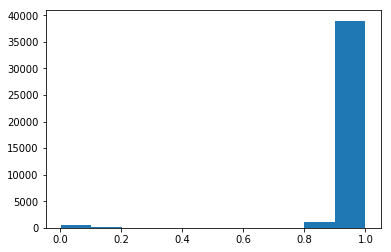

In [136]:
sum(T_priv_c)*1.0/len(T_priv_c)
plt.hist(est_Q)

In [183]:
form = 'mois_saisie_occ + ndem + Number_of_children + temps + exper + age + duree_listes_horsAR + College_education + nivetude2 + Vocational + High_school_dropout + Married + Layoff + Economic_Layoff + Personnal_Layoff + End_of_Fixed_Term_Contract + End_of_Temporary_Work + Other_reasons_of_unemployment + No_exp_in_the_job + One_to_5_years_of_exp_in_the_job + More_5_years_of_exp_in_the_job + Statistical_risk_level_2 + Statistical_risk_level_3 + Other_Statistical_risk + Search_for_a_full_time_position + Do_not_search_for_a_full_time_position + Sensitive_suburban_area + Wage_target_1200_1349_euros + Wage_target_1350_1549_euros + Wage_target_1550_1799_euros + Wage_target_1800_2200_euros + Wage_target_2200_euros + No_Wage_target + Employment_component_level_1 + Employment_component_level_2 + Employment_component_missing + First_unemployment_spell + Manager + Technician + Skilled_clerical_worker + Unskilled_clerical_worker + Skilled_blue_colar + Unskilled_blue_colar + No_child + One_child + More_than_one_child + Q1 + Q2 + Q3 + Q4 + rsqstat_RS2 + rsqstat_RS3 + cemploi_CE2 + zus_IN + zus_NT + zus_NZ + zus_ZU + salaire_B + salaire_C + salaire_D + salaire_E + salaire_G + lot_12 + lot_13 + lot_14 + lot_15 + lot_16 + lot_17 + lot_18 + lot_19 + lot_22 + lot_23 + lot_24 + lot_25 + lot_6 + lot_7 + lot_Inconnu_des_OPP'

form_tot = 'Y ~ T + T*('+ form + ') + ' + form
simple_form = ' Y ~ T +' + form
print form_tot


Y ~ T + T*(mois_saisie_occ + ndem + Number_of_children + temps + exper + age + duree_listes_horsAR + College_education + nivetude2 + Vocational + High_school_dropout + Married + Layoff + Economic_Layoff + Personnal_Layoff + End_of_Fixed_Term_Contract + End_of_Temporary_Work + Other_reasons_of_unemployment + No_exp_in_the_job + One_to_5_years_of_exp_in_the_job + More_5_years_of_exp_in_the_job + Statistical_risk_level_2 + Statistical_risk_level_3 + Other_Statistical_risk + Search_for_a_full_time_position + Do_not_search_for_a_full_time_position + Sensitive_suburban_area + Wage_target_1200_1349_euros + Wage_target_1350_1549_euros + Wage_target_1550_1799_euros + Wage_target_1800_2200_euros + Wage_target_2200_euros + No_Wage_target + Employment_component_level_1 + Employment_component_level_2 + Employment_component_missing + First_unemployment_spell + Manager + Technician + Skilled_clerical_worker + Unskilled_clerical_worker + Skilled_blue_colar + Unskilled_blue_colar + No_child + One_child

In [188]:
from statsmodels.iolib.summary2 import summary_col
import statsmodels.formula.api as smf
#  If you supply 1/W then the variables are pre- multiplied by 1/sqrt(W).
res_simp = smf.wls( simple_form, data=all_data, weights = est_Q**2).fit()
res_tot = smf.wls( form_tot, data=all_data, weights = est_Q**2).fit()
dfoutput = summary_col([res_simp, res_tot],model_names=['te reg, ctrls', 'interacted'],stars=True)
dfoutput

,"te reg, ctrls",interacted
College_education,-0.2070,-0.5288
,(0.1580),(0.3229)
Do_not_search_for_a_full_time_position,-0.0073***,-0.0012
,(0.0020),(0.0066)
Economic_Layoff,0.0368,0.0811
,(0.0228),(0.0778)
Employment_component_level_1,0.0183***,0.0264*
,(0.0041),(0.0146)
Employment_component_level_2,0.0095***,0.0185**
,(0.0021),(0.0075)


In [254]:
''' Run WLS (interacted and non interacted, with controls)
'''
def get_reg_results(X,T,Y,est_Q): 
    X = X.apply(lambda x: x-x.mean())
    all_data = X.copy()
    all_data['Y'] = Y
    all_data['T'] = T
    form = ols_formula(all_data, 'Y', top_level = False, excluded_cols = 'T' )
    form_tot = 'Y ~ T + T*('+ form + ') + ' + form
    simple_form = ' Y ~ T +' + form
    res_simp = smf.wls( simple_form, data=all_data, weights = est_Q**2).fit()
    res_tot = smf.wls( form_tot, data=all_data, weights = est_Q**2).fit()
    dfoutput = summary_col([res_simp, res_tot],model_names=['te reg, ctrls', 'interacted'],stars=True)
    return [dfoutput, res_simp, res_tot]

A_woman[ (T_public == 1) | (control == 1) ]['Woman']

,Woman,Woman
0,0,0
5,1,1
7,0,0
10,0,0
13,0,0
21,1,1
22,1,1
42,0,0
52,0,0
55,1,1


In [256]:
A_french[ (T_public == 1) | (control == 1) ].to_csv('data/crepon/A_french.csv', index=False, header = False)
A_age[ (T_public == 1) | (control == 1) ].to_csv('data/crepon/A_age.csv',index=False, header = False)
A_woman[ (T_public == 1) | (control == 1) ].iloc[:,0].to_csv('data/crepon/A_woman.csv',index=False, header = False)

In [257]:

X_pub_c = X_[ (T_public == 1) | (control == 1) ]
T_pub_c = T_public[ (T_public == 1) | (control == 1) ]
Y_6mo_employ_pub_c= Y_6mo_employ[ (T_public == 1) | (control == 1) ]
X_pub_c = X_pub_c.rename({'lot_Inconnu des OPP':'lot_Inconnu_des_OPP','1 _to_5_years_of_exp_in_the_job':'1_to_5_years_of_exp_in_the_job'}, axis = 'columns')
[est_Q_pub, clf] = estimate_prop(X_pub_c, T_pub_c, X_pub_c, T_pub_c)

[dfoutput_pub, res_simp_pub, res_tot_pub] = get_reg_results(X_pub_c,T_pub_c,Y_6mo_employ_pub_c,est_Q_pub)

print [X_pub_c.shape]


[(7950, 77)]


In [258]:
dfoutput_pub

,"te reg, ctrls",interacted
College_education,-0.1904,-0.5314*
,(0.2350),(0.2836)
Do_not_search_for_a_full_time_position,-0.0069,-0.0036
,(0.0047),(0.0056)
Economic_Layoff,-0.0550,0.0671
,(0.0482),(0.0828)
Employment_component_level_1,0.0450***,0.0284**
,(0.0103),(0.0125)
Employment_component_level_2,0.0251***,0.0190***
,(0.0053),(0.0064)


In [211]:
data = [ X_pub_c, T_pub_c, Y_6mo_employ_pub_c, ]
print [ len(d) for d in data]

[7950, 7950, 7950]
